In [ ]:
### lassification models
"""
    Most common classifications models
""

In [4]:
## libraries needed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
# classification models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# creating a dictionary with all models
classifiers = {
    'KNN':KNeighborsClassifier(3),
    'SVM':SVC(gamma=2, C=1),
    'GP':GaussianProcessClassifier(1.0 * RBF(1.0)),
    'DT':DecisionTreeClassifier(max_depth=5),
    'MLP':MLPClassifier(alpha=0, max_iter=1000),
    'Bayes':GaussianNB()}

In [6]:
# creating artificial dataset for testing our models, this dataset is 2-dimenton dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                          n_clusters_per_class=1)

rng = np.random.RandomState(2)
x += 1 * rng.uniform(size=x.shape)
linearly_separable = (x,y)

datasets = [make_moons(noise=0.1),
            make_circles(noise=0.1, factor=0.5),
            linearly_separable ]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'xmap', 'aplha'
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'xmap', 'aplha'
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'xmap', 'aplha'


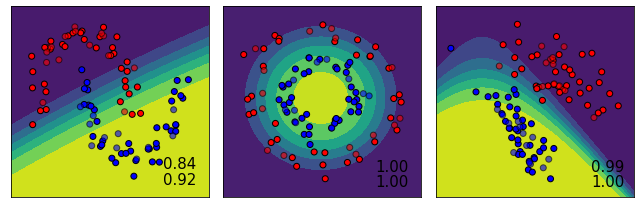

In [17]:
# choose model
model_name = 'Bayes'


figure = plt.figure(figsize=(9, 3))
h = .02  # step
i = 1    # counter

# iterate over each dataset
for ds_cnt, ds in enumerate(datasets):
    # gettin every single dataset
    x, y = ds
    # normalize the data before training the ML model
    x = StandardScaler().fit_transform(x)
    
    # split the data into train and test datasets
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)
    
    # data for plotting
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # choose the selected model
    model = classifiers[model_name]
    ax = plt.subplot(1, 3, i)
    # train the model
    model.fit(xtrain, ytrain)
    # scores
    score_train = model.score(xtrain, ytrain)
    score_test = model.score(xtest, ytest)
    
    if hasattr(model, "decision_function"):
        zz = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # put the result into a color plot
    zz = zz.reshape(xx.shape)
    ax.contourf(xx, yy, zz, xmap=cm, aplha=.8)
    
    # plot the trainning points
    ax.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, cmap=cm_bright,
              edgecolors='k')
    
    # plot the testing points
    ax.scatter(xtest[:, 0], xtest[:, 1], c=ytest, cmap=cm_bright,
              edgecolors='k', alpha=0.6)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    # plot scores
    ax.text(xx.max() - .3, yy.min() + .7, '%.2f' % score_train,
           size=15, horizontalalignment='right')
    
    ax.text(xx.max() - .3, yy.min() + .3, '%.2f' % score_test,
           size=15, horizontalalignment='right')
    i+=1
    
plt.tight_layout()
plt.show()
    
    



In [ ]:
##################  DIGITS CLASSIFICATION #############

"""
Vamos a clasificar imagenes de digistos del 0 al 9, dicho dataset se 
encuentra por defecto el la libreria de Sklearn. Las imagenes del dataset son de
baja resolucion por lo que el problema de clasificacion será de baja dimensionalidad
"""

In [6]:
##### librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


In [7]:
## cragamos el dataset de digitos
digits = datasets.load_digits()
# target contiene los datos deseados(los reales), imagenes es lo que vamos a clasificar
target, images = digits['target'], digits['images'] 


In [8]:
### tamaño de muestras
n_samples = digits['target'].shape[0]
n_samples

1797

Text(0.5, 1.0, 'Target: 8')

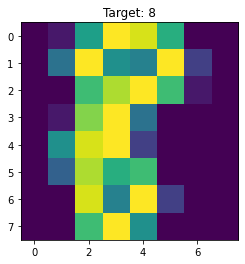

In [86]:
## muestra digitos aleatorios del dataset
sample = np.random.randint(n_samples)
plt.imshow(images[sample])
plt.title('Target: %i' % target[sample])


In [40]:
# aplanar las imagenes
x = images.reshape((n_samples, -1))
x.shape

(1797, 64)

In [48]:
# ahora crearemos nuestro dataset de entranamiento y de prueba
xtrain, xtest, ytrain, ytest = train_test_split(x, target)
xtest.shape

(450, 64)

In [99]:
# instanciamos nuestro modelo de clasificacion
model = svm.SVC(gamma=0.0001)

In [100]:
# entrenamos el modelo
model.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
# aplicar métricas del modelo
print('Train: ', model.score(xtrain, ytrain)) # utiliza el F1-Macro
print('Test: ', model.score(xtest, ytest))    # utiliza el F1-Macro

Train:  0.9792130660727543
Test:  0.9733333333333334


In [59]:
# predecimos valores que el modelo no ha visto
ypred =  model.predict(xtest)

In [60]:
# reporte de clasificacion
"""
Este reporte muestra vario scores sobre el desempeño que tuvo el modelo en general y
tambien por cada clase en particular. Entre estos estan el F1-score, F1-macro, accuracy, etc
"""
print("Classification report: \n", metrics.classification_report(ytest, ypred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        48
           2       1.00      1.00      1.00        41
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        47
           5       0.96      0.98      0.97        45
           6       1.00      0.98      0.99        44
           7       0.93      0.98      0.95        41
           8       0.91      0.96      0.93        45
           9       0.96      0.90      0.93        50

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [61]:
# matriz de confucion
"""
Entre mas valores en la diagonal tega nuestra matriz de confusion, mejor prediccion
tendremos. El tamaño de la matriz esta determiando por el numero de calses que tengamos,
en este caso coo estamos clasificando digitos será de 10*10
"""
print('Confusion matrix: \n', metrics.confusion_matrix(ytest, ypred))

Confusion matrix: 
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  1]
 [ 0  0  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  0  0  3  2 45]]


Text(0.5, 1.0, 'Prediction: 5 ')

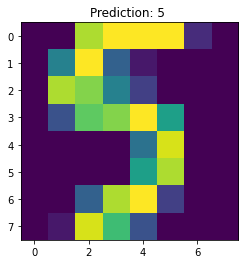

In [85]:
# dibuja una prediccion aleatoria 
"""
Muestra una imagen random y tambien muestra el digito que predijo el 
clasificador, asi comprobamos si si le atina a la mayoria de  valotres
"""
sample = np.random.randint(xtest.shape[0]) # elige un numero aleatorio
plt.imshow(xtest[sample].reshape((8,8)))
plt.title('Prediction: %i ' % ypred[sample])